## **Legendary Pokemon Classifier**

In this problem, I will analyze the *Pokemon* dataset. The goal is to predict whether a
*Pokemon* will be classified as legendary or not. For this project, I will construct a decision tree as well
as a random forest. The data consists of both *continuous* and *categorical* variables. 

![Pokemon](https://static.fandomspot.com/images/12/10817/00-featured-dragonite-non-legendary-pokemon.jpg)

## **1. Import the required libraries**
Import all the required libraries required for this problem set.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

## **2. Reading data from .csv file**

Read from the *Pokemon.csv* file using panda method `read_csv()` and once read, print the first $5$ rows of data to check if anything is wrong. Do check on other properties such as shape, et cetera.

In [84]:
data = pd.read_csv('Pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [20]:
# checking the number of fields and rows in the dataset
data.shape

(800, 13)

In [19]:
# checking for duplicates and deleting the duplicates if found
data.drop_duplicates()
data.shape

(800, 13)

In [23]:
# checking the fields and their datatypes

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [25]:
# checking statistical information abut numerical fields

data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [44]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [47]:
data.isna().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## **3. Data Preprocessing**
Preprocess the data. In this project, we will represent all the non-numeric field with numeric labels. 

In [85]:
data = data.drop('#',axis = 1)
data = data.drop('Name',axis = 1)
data['Type 2'] = data['Type 2'].replace({np.nan:'X'})

le = LabelEncoder()
encoded_labels_type_1 = le.fit_transform(data['Type 1'])
data['Type 1'] = encoded_labels_type_1 
print(le.classes_)

encoded_labels_type_2 = le.fit_transform(data['Type 2'])
data['Type 2'] = encoded_labels_type_2
print(le.classes_)

data['Legendary'] = data['Legendary'].replace({False:0, True:1})

data

['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water']
['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water' 'X']


,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,13,318,45,49,49,65,65,45,1,0
1,9,13,405,60,62,63,80,80,60,1,0
2,9,13,525,80,82,83,100,100,80,1,0
3,9,13,625,80,100,123,122,120,80,1,0
4,6,18,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
795,15,4,600,50,100,150,100,150,50,6,1
796,15,4,700,50,160,110,160,110,110,6,1
797,14,8,600,80,110,60,150,130,70,6,1
798,14,1,680,80,160,60,170,130,80,6,1


## **4. Creating train and test dataset** 

Now, let’s split the dataset in an $80:20$ ratio for training and testing set, respectively.

In [98]:
X = data.drop(columns = 'Legendary').values
y = data['Legendary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We then print the shape of each data set.

In [110]:
print('Shape of X_train ->',X_train.shape)
print('Shape of X_test ->',X_test.shape)
print('Shape of y_train ->',y_train.shape)
print('Shape of y_test ->',y_test.shape)

Shape of X_train -> (640, 10)
Shape of X_test -> (160, 10)
Shape of y_train -> (640,)
Shape of y_test -> (160,)


Now, we visualize the distribution of train and test data set.

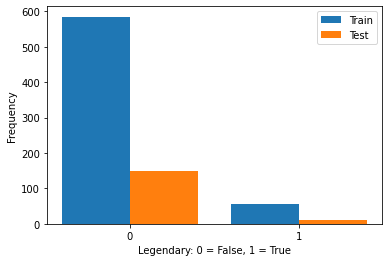

In [131]:
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)

fig, ax = plt.subplots()
ax.bar(train_classes - 0.2, train_counts, width=0.4, label='Train')
ax.bar(test_classes + 0.2, test_counts, width=0.4, label='Test')
ax.set_xticks(np.arange(len(train_classes)))
ax.set_xticklabels(train_classes)
ax.set_xlabel('Legendary: 0 = False, 1 = True')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

In [111]:
print("Non-Legendary Pokemon: Size of Train Set ->", train_counts[0]/y_train.shape[0]) 
print("Non-Legendary Pokemon: Size of Test Set ->", test_counts[0]/y_test.shape[0]) 

Non-Legendary Pokemon: Size of Train Set -> 0.9140625
Non-Legendary Pokemon: Size of Test Set -> 0.9375


The data is evenly split since the ratio of non-Legendary *Pokemon* in train set is almost equal to the ratio of non-Legendary *Pokemon* in test set.

## **4. Building and Evaluating the Model** 

Since we have both the training and testing data set, it is time to train our models and classify the test set. First, we will train a Decision Tree on this dataset and evaluate its performance. Then, we will train a Random Forest on the same dataset and compare their performance.

In [168]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt_model.fit(X_train, y_train)

dt_pred_test = dt_model.predict(X_test)
print("Accuracy of the Test Set: ", accuracy_score(y_test, dt_pred_test))

Accuracy of the Test Set:  0.96875


Print the branching of the Decision Tree model. `feature_0`, `feature_1`, `feature_2`, `feature_3`, ... corresponds to `Type 1`, `Type 2`, `Total`, `HP`, ... respectively. It is obvious that `Total` is the best indicators of this decision tree model using entropy. If `Total` $\leq 577.70$, then we can easily classified the *Pokemon* as non-Legendary, but if it is greater than this, then we need to check on other features. Hence, this feature carries more information (it is the root of the tree) about the Legendary status of the *Pokemon* than the others.



In [133]:
print(export_text(dt_model))

|--- feature_2 <= 577.50
|   |--- class: 0
|--- feature_2 >  577.50
|   |--- feature_2 <= 650.00
|   |   |--- feature_2 <= 605.00
|   |   |   |--- feature_4 <= 117.50
|   |   |   |   |--- feature_4 <= 73.50
|   |   |   |   |   |--- feature_7 <= 145.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  145.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  73.50
|   |   |   |   |   |--- feature_2 <= 585.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  585.00
|   |   |   |   |   |   |--- feature_9 <= 2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_9 >  2.50
|   |   |   |   |   |   |   |--- feature_1 <= 5.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  5.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 16.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  16.50
|   |   |   |

Next, we will evaluate the *F1-Score*. *F1-Score* is the harmonic mean of precision and recall given by the formula:



\begin{align}
        F1-Score = \frac{2 * Precision * Recall}{Precision + Recall}
\end{align}


In [143]:
dt_pred_train = dt_model.predict(X_train)
print('Training Set Evaluation F1-Score ->',f1_score(y_train,dt_pred_train))
print('Testing Set Evalutation F1-Score ->',f1_score(y_test,dt_pred_test))

Training Set Evaluation F1-Score -> 1.0
Testing Set Evalutation F1-Score -> 0.761904761904762


Now that you see that decision tree performed really well for training set evaluation, but its performance decreases drastically when dealing with data set that is outside of the training set. This is an example of *overfitting* on the training data. We can try a different branching criterion instead of entropy. Let's try *Gini Impurity* and limit the depth of our tree model. 

*Gini Impurity* is given by the formula:

\begin{align}
        Gini = 1- \sum_{i=1}^{C} (p_i)^2
\end{align}

where if we have $C$ total classes and $p_i$ is the probability of picking a datapoint with class $i$.

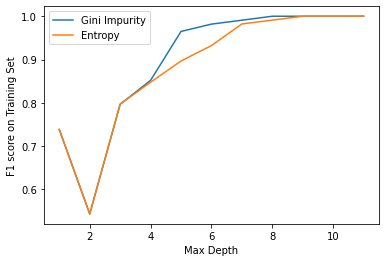

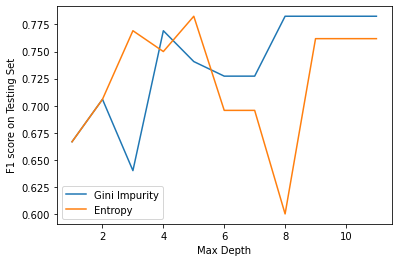

In [152]:
depths = range(1, 12)

f1_gini_train = []
f1_gini_test = []
f1_entropy_train = []
f1_entropy_test = []

# loop over the range of depths
for depth in depths:
    dt_gini_model = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt_gini_model.fit(X_train, y_train)
    y_pred_gini_train = dt_gini_model.predict(X_train)
    y_pred_gini_test = dt_gini_model.predict(X_test)
    f1_gini_train.append(f1_score(y_train, y_pred_gini_train))
    f1_gini_test.append(f1_score(y_test, y_pred_gini_test))

    dt_entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dt_entropy_model.fit(X_train, y_train)
    y_pred_entropy_train = dt_entropy_model.predict(X_train)
    y_pred_entropy_test = dt_entropy_model.predict(X_test)
    f1_entropy_train.append(f1_score(y_train, y_pred_entropy_train))
    f1_entropy_test.append(f1_score(y_test, y_pred_entropy_test))

# plot the F1 scores for different criteria
plt.plot(depths, f1_gini_train, label='Gini Impurity')
plt.plot(depths, f1_entropy_train, label='Entropy')
plt.xlabel('Max Depth')
plt.ylabel('F1 score on Training Set')
plt.legend()
plt.show()


plt.plot(depths, f1_gini_test, label='Gini Impurity')
plt.plot(depths, f1_entropy_test, label='Entropy')
plt.xlabel('Max Depth')
plt.ylabel('F1 score on Testing Set')
plt.legend()
plt.show()


The tree using *Gini Impurity* with the depth of $9$ has the best performing *F-1 score* on unseen data, but it is still not good enough, there is still overfitting issue. The tree using *Entropy* with the depth of 5 seems to be the best model here, since it has an *F-1 score* close to the best performing *F-1 score* on unseen data, at the same time, it generalize pretty well for the seen data with an *F-1 score* of around $0.89$. A good sign of less overfitting, but can we do better? Let's now try Random Forest. :)

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rf_model.fit(X_train, y_train)

rf_pred_train = rf_model.predict(X_train)
print('Training Set Evaluation F1-Score ->',f1_score(y_train,rf_pred_train))

Training Set Evaluation F1-Score -> 1.0


In [167]:
rf_pred_test = rf_model.predict(X_test)
print('Testing Set Evaluation F1-Score ->',f1_score(y_test,rf_pred_test))

print("Accuracy of the Test Set:", accuracy_score(y_test,rf_pred_test))

Testing Set Evaluation F1-Score -> 0.7826086956521738
Accuracy of the Test Set: 0.96875


With the Random Forest model, we are getting better *F-1 score*. But why is this the case?

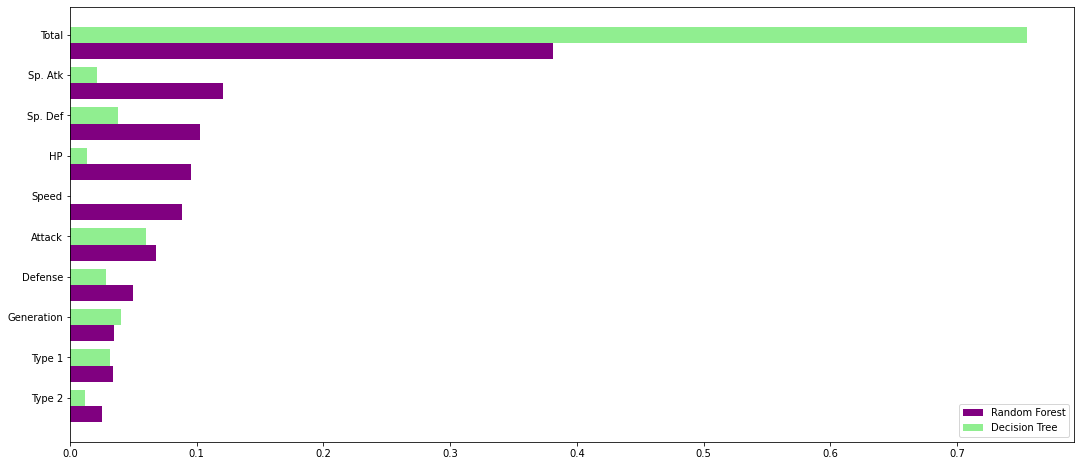

In [160]:
feature_importance=pd.DataFrame({
    'rf':rf_model.feature_importances_,
    'dt':dt_model.feature_importances_
},index=data.drop(columns=['Legendary']).columns)
feature_importance.sort_values(by='rf',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rf'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

Random Forest leverages the power of multiple decision trees. It doesn't rely on the feature importance given by a single decision tree. As you can see clearly in the graph above, Decision Tree gives high importance to a particular set of features, which in this case it is Total, but Random Forest chooses feature randomly throughout the training process. Therefore, it does not depend highly on any specific set of features. Therefore, the Random Forest can generalize the data in a better way. This randomized feature selection makes a random forest much more accurate than a decision tree.

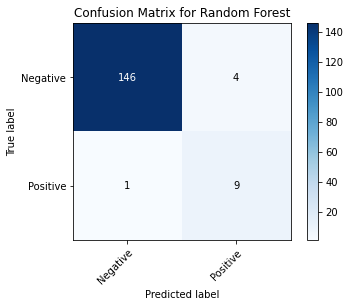

In [164]:
cm = confusion_matrix(y_test, rf_pred_test)

# define the plot
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap=plt.cm.Blues)

# add colorbar and labels
ax.figure.colorbar(im, ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# loop over data to annotate the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

# add a title
ax.set_title("Confusion Matrix for Random Forest")

# show the plot
plt.show()




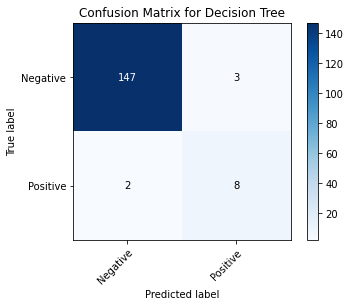

In [166]:
cm = confusion_matrix(y_test, dt_pred_test)

# define the plot
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap=plt.cm.Blues)

# add colorbar and labels
ax.figure.colorbar(im, ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# loop over data to annotate the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

# add a title
ax.set_title("Confusion Matrix for Decision Tree")

# show the plot
plt.show()

Overall, both models have similar numbers of true positives and true negatives, but Random Forest has one less false negative and one more false positive than Decision Tree.Based on the metrics we have computed such as accuracy and *F1-score*, it appears that Random Forest has a slightly better performance than Decision Tree, although the difference is relatively small. However, it's worth noting that these metrics only tell part of the story, and other factors such as the specific context of the problem should also be considered when evaluating the models.